# **CROP YIELD PREDICTION**

# 1.Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1.1 Loading the dataset

In [2]:
df = pd.read_csv('finalised_dataset_x.csv',na_values='=')
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


### 1.2 Checking the shape of dataset

In [3]:
df.shape

(12628, 17)

In [4]:
df.columns

Index(['Unnamed: 0', 'state_names', 'district_names', 'crop_year',
       'season_names', 'crop_names', 'area', 'temperature', 'wind_speed',
       'pressure', 'humidity', 'soil_type', 'N', 'P', 'K', 'production',
       'Yield'],
      dtype='object')

In [5]:
df=df.drop('Yield', axis = 1)

### 1.3 Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  float64
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 1.5+ MB


# 2. Data Cleaning

### 2.1 Reducing Data to One State for Ease

In [7]:
df = df[df['state_names'] == "Maharashtra"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  float64
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 1.6+ MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  float64
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 1.6+ MB


### 2.2 Checking the missing values

In [9]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
dtype: int64

### 2.3 Corelation Heatmap

C:\Users\Sanyog\AppData\Local\Temp\ipykernel_17848\3266039992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = df.corr()


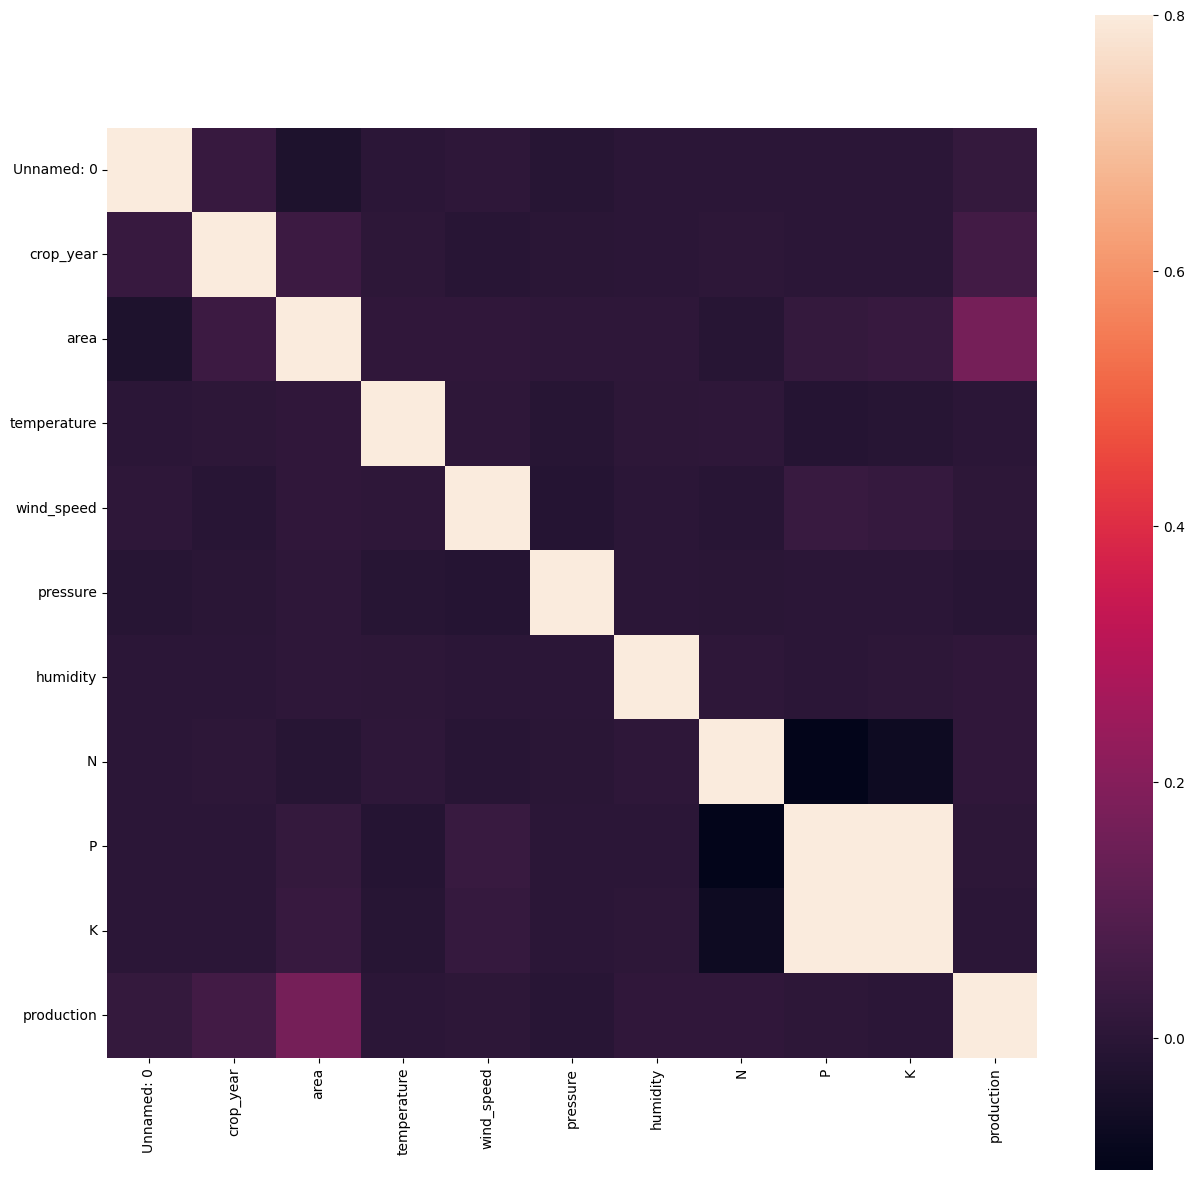

In [10]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

### 2.4 Taking Data only after 2004 because the data after 2004 is affecting the rersult alot

In [11]:
df = df[df['crop_year']>=2004]
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
212,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200.0,20.768143,2.002031,1013.280471,20.427922,peaty,10.500,27.300,27.300,4800.0
213,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500.0,20.722713,2.105239,1015.061641,20.468584,silty,39.720,105.920,52.960,143400.0
214,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300.0,21.419190,2.046843,1015.770055,21.836158,peaty,8.008,8.008,0.000,3900.0
215,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100.0,20.425919,2.024060,1013.971163,21.028403,sandy,5.824,14.560,5.824,100.0
216,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400.0,20.823344,1.989898,1015.453191,20.340815,silty,0.000,0.000,0.000,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 212 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7255 non-null   int64  
 1   state_names     7255 non-null   object 
 2   district_names  7255 non-null   object 
 3   crop_year       7255 non-null   int64  
 4   season_names    7255 non-null   object 
 5   crop_names      7255 non-null   object 
 6   area            7255 non-null   float64
 7   temperature     7255 non-null   float64
 8   wind_speed      7255 non-null   float64
 9   pressure        7255 non-null   float64
 10  humidity        7255 non-null   float64
 11  soil_type       7255 non-null   object 
 12  N               7255 non-null   float64
 13  P               7255 non-null   float64
 14  K               7255 non-null   float64
 15  production      7143 non-null   float64
dtypes: float64(9), int64(2), object(5)
memory usage: 963.6+ KB


### 2.5 Making a Yield Column

In [13]:
df['Yield'] = df['production']/df['area']
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
212,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200.0,20.768143,2.002031,1013.280471,20.427922,peaty,10.500,27.300,27.300,4800.0,0.393443
213,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500.0,20.722713,2.105239,1015.061641,20.468584,silty,39.720,105.920,52.960,143400.0,0.596258
214,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300.0,21.419190,2.046843,1015.770055,21.836158,peaty,8.008,8.008,0.000,3900.0,0.735849
215,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100.0,20.425919,2.024060,1013.971163,21.028403,sandy,5.824,14.560,5.824,100.0,1.000000
216,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400.0,20.823344,1.989898,1015.453191,20.340815,silty,0.000,0.000,0.000,14000.0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


### 2.6 Dropping Unnecessary Columns

In [14]:
df = df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df

,crop_year,crop_names,area,temperature,wind_speed,pressure,humidity,N,P,K,production,Yield
212,2004,Arhar/Tur,12200.0,20.768143,2.002031,1013.280471,20.427922,10.500,27.300,27.300,4800.0,0.393443
213,2004,Bajra,240500.0,20.722713,2.105239,1015.061641,20.468584,39.720,105.920,52.960,143400.0,0.596258
214,2004,Groundnut,5300.0,21.419190,2.046843,1015.770055,21.836158,8.008,8.008,0.000,3900.0,0.735849
215,2004,Jowar,100.0,20.425919,2.024060,1013.971163,21.028403,5.824,14.560,5.824,100.0,1.000000
216,2004,Maize,11400.0,20.823344,1.989898,1015.453191,20.340815,0.000,0.000,0.000,14000.0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,3300.0,0.825000
12624,2014,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,200.0,0.153846
12625,2014,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,26800.0,0.920962
12626,2014,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,11500.0,1.223404


### 2.7 Filling Null values with mean

In [15]:
df = df.fillna(df.mean())

C:\Users\Sanyog\AppData\Local\Temp\ipykernel_17848\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


# 3. Data Visualization

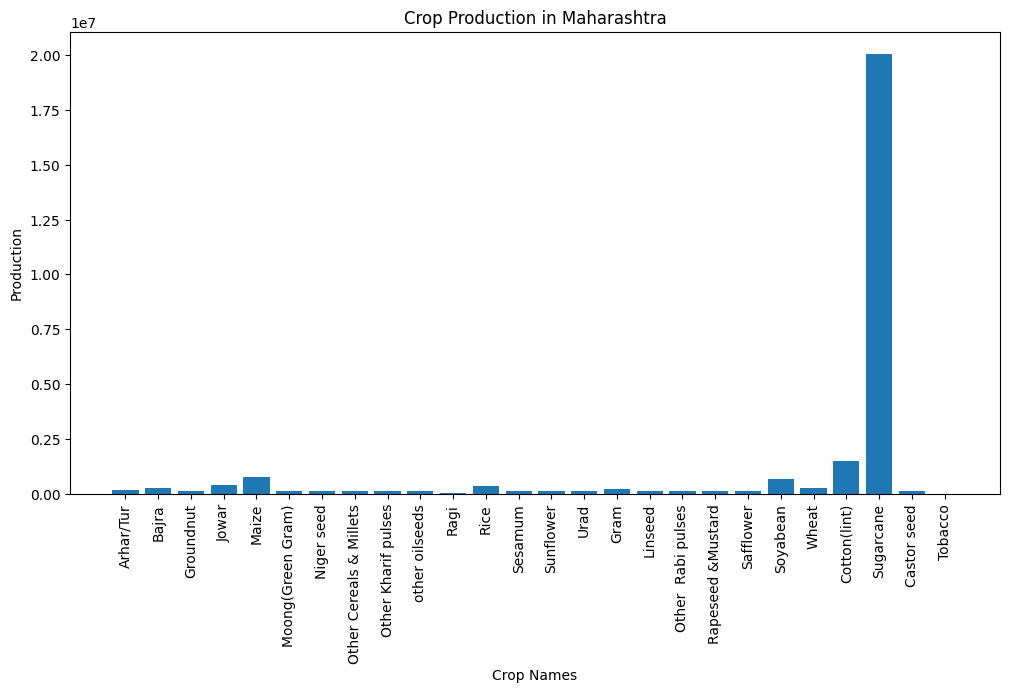

In [16]:
import matplotlib.pyplot as plt

# Bar plot of crop_names and production
plt.figure(figsize=(12, 6))
plt.bar(df['crop_names'], df['production'])
plt.xlabel('Crop Names')
plt.ylabel('Production')
plt.title('Crop Production in Maharashtra')
plt.xticks(rotation=90)
plt.show()

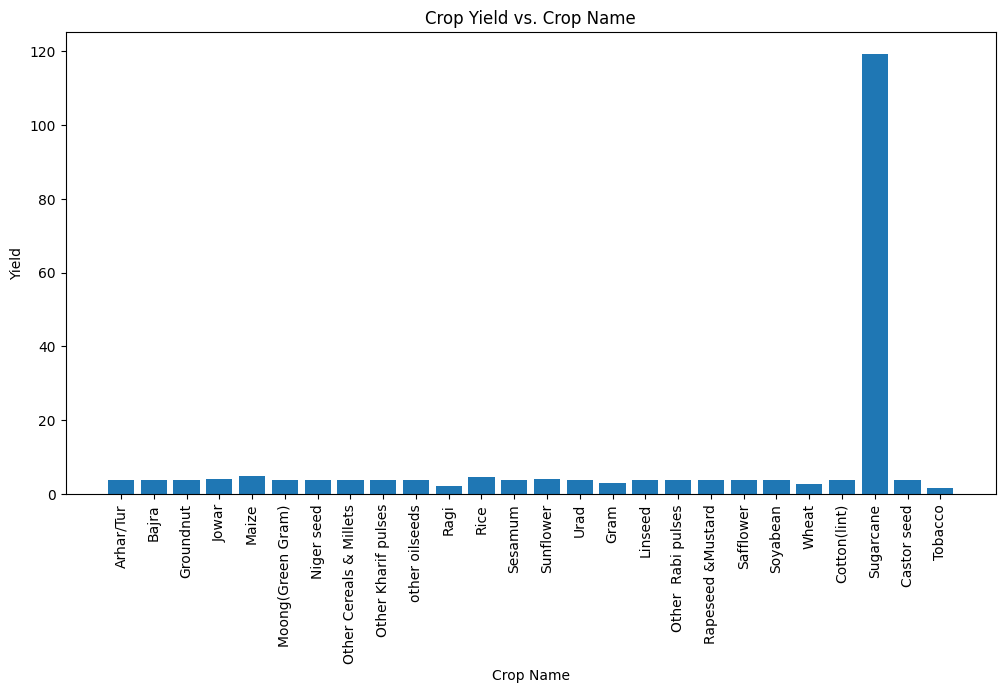

In [17]:
# Scatter plot of area and yield
plt.figure(figsize=(12, 6))
plt.bar(df['crop_names'], df['Yield'])
plt.xlabel('Crop Name')
plt.ylabel('Yield')
plt.title('Crop Yield vs. Crop Name')
plt.xticks(rotation=90)
plt.show()

# 4. Data Preprocessing

### 4.1 Train and Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Select the relevant features for modeling (e.g., area, temperature, wind_speed, etc.)
features = ['temperature', 'wind_speed', 'pressure', 'humidity', 'N', 'P', 'K']
target = 'Yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [20]:
print(X_train)

       temperature  wind_speed     pressure   humidity       N       P      K
3846     20.521093    1.979203  1014.562111  20.847656   4.531   4.531   0.00
1586     21.220452    2.010306  1014.338089  21.732506   2.800   0.000   0.00
5124     20.469745    2.069146  1014.670752  21.868001   8.600   8.600   0.00
10661    20.253692    2.045181  1013.178836  21.489026   1.950   1.950   1.95
3789     20.082700    1.974526  1014.136295  20.529852  38.250  38.250  38.25
...            ...         ...          ...        ...     ...     ...    ...
6581     20.090749    1.983827  1013.157407  20.411220   0.224   0.280   0.00
9120     21.544164    2.089016  1013.109528  21.377246   0.000  26.832   0.00
9155     20.960905    2.006062  1013.565065  21.525920   7.588   7.588   0.00
9319     21.965921    2.061763  1014.285744  21.873364   2.921   2.921   0.00
1582     20.139821    2.106225  1013.705632  20.377305   7.476   7.476   0.00

[5804 rows x 7 columns]


In [21]:
print(X_test)

       temperature  wind_speed     pressure   humidity        N       P    K
5229     21.626783    2.093701  1015.509013  20.251363    1.500   0.000  0.0
3067     20.390844    2.036080  1015.153060  20.485877    5.980   5.980  0.0
6937     20.764626    1.999956  1014.064322  21.919638    8.740   8.740  0.0
11148    21.920160    2.047580  1014.961353  20.462800    3.496   3.496  0.0
11818    22.004754    1.993841  1015.757024  20.567282    0.000   0.000  0.0
...            ...         ...          ...        ...      ...     ...  ...
10466    21.566933    2.030563  1015.134621  21.148684  843.640   0.000  0.0
8280     20.262381    2.071677  1014.837118  20.669404    7.588   7.588  0.0
10154    21.010399    2.044700  1013.099303  21.393417    0.000  23.184  0.0
8348     21.231870    2.064796  1014.620437  20.759083    3.496   3.496  0.0
8749     21.257402    1.977638  1014.239239  20.476395    9.630  24.610  0.0

[1451 rows x 7 columns]


In [22]:
print(y_train)

3846      0.535714
1586     84.098712
5124      0.668508
10661     0.327273
3789      0.333333
           ...    
6581      0.200000
9120      1.836364
9155      1.142857
9319      0.666667
1582      0.936937
Name: Yield, Length: 5804, dtype: float64


In [23]:
print(y_test)

5229     0.500000
3067     1.165605
6937     0.666667
11148    0.800000
11818    0.333333
           ...   
10466    1.236422
8280     0.047619
10154    0.148148
8348     0.615385
8749     0.677419
Name: Yield, Length: 1451, dtype: float64


# 5. Modeling

### 5.1 Linear Regressor

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 181.55069158382494
R-squared (R2) Score: -0.002383914692706268


### 5.2 Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 198.62553031673133
R-squared (R2) Score: -0.09665810083060289


### 5.3 Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the Decision Tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 400.08936589851646
R-squared (R2) Score: -1.2089871501872484


### 5.4 SVM Regressor

In [ ]:
from sklearn.svm import SVR

# Create an instance of the SVM regressor model
model = SVR(kernel='linear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)